#### Contents

##### 01 Import libraries and data
##### 02 Prepare data
##### 03 Run Random Forest
##### 04 Identify Feature Importances



#### 01 Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split

2024-11-10 10:26:54.217293: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path = r'/Users/Owner/Documents/CareerFoundry/Machine Learning Specialization/Data Sets'

In [3]:
df_obs = pd.read_csv(os.path.join(path, 'Observations_clean.csv'), index_col = False)

In [4]:
df_pleasant = pd.read_csv(os.path.join(path, 'Pleasant_weather_cleaned.csv'), index_col = False)

In [5]:
df_obs.head()

,DATE,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [6]:
df_pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 02 Prepare data

In [8]:
# Create a dataframe containing only dusseldorf stations for observation set

kassel_stations = df_obs.filter(like='KASSEL', axis=1)

In [9]:
kassel_stations.head()

,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,KASSEL_cloud_cover
0,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8
1,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6
2,0.91,1.0129,0.12,0.60,0.0,6.5,6.0,8.0,8
3,0.87,1.0290,0.12,0.00,0.0,5.8,5.2,6.5,6
4,0.86,1.0262,0.13,0.71,0.0,5.4,3.7,6.0,7


In [10]:
# Create a dataframe containing only dusseldorf stations for pleasant weather

kassel_pleasant = df_pleasant.filter(like='KASSEL', axis=1)

In [11]:
kassel_pleasant.head()

,KASSEL_pleasant_weather
0,0
1,0
2,0
3,0
4,0


In [12]:
kassel_stations.shape

(22950, 9)

In [13]:
kassel_pleasant.shape

(22950, 1)

In [14]:
X = kassel_stations
y = kassel_pleasant

In [15]:
#transform to arrays
X = np.array(X)
y = np.array(y)

In [16]:
X.shape

(22950, 9)

In [17]:
y.shape

(22950, 1)

In [18]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [19]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212, 1)
(5738, 9) (5738, 1)


#### 03 Run Random Forest

In [21]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10)

In [22]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


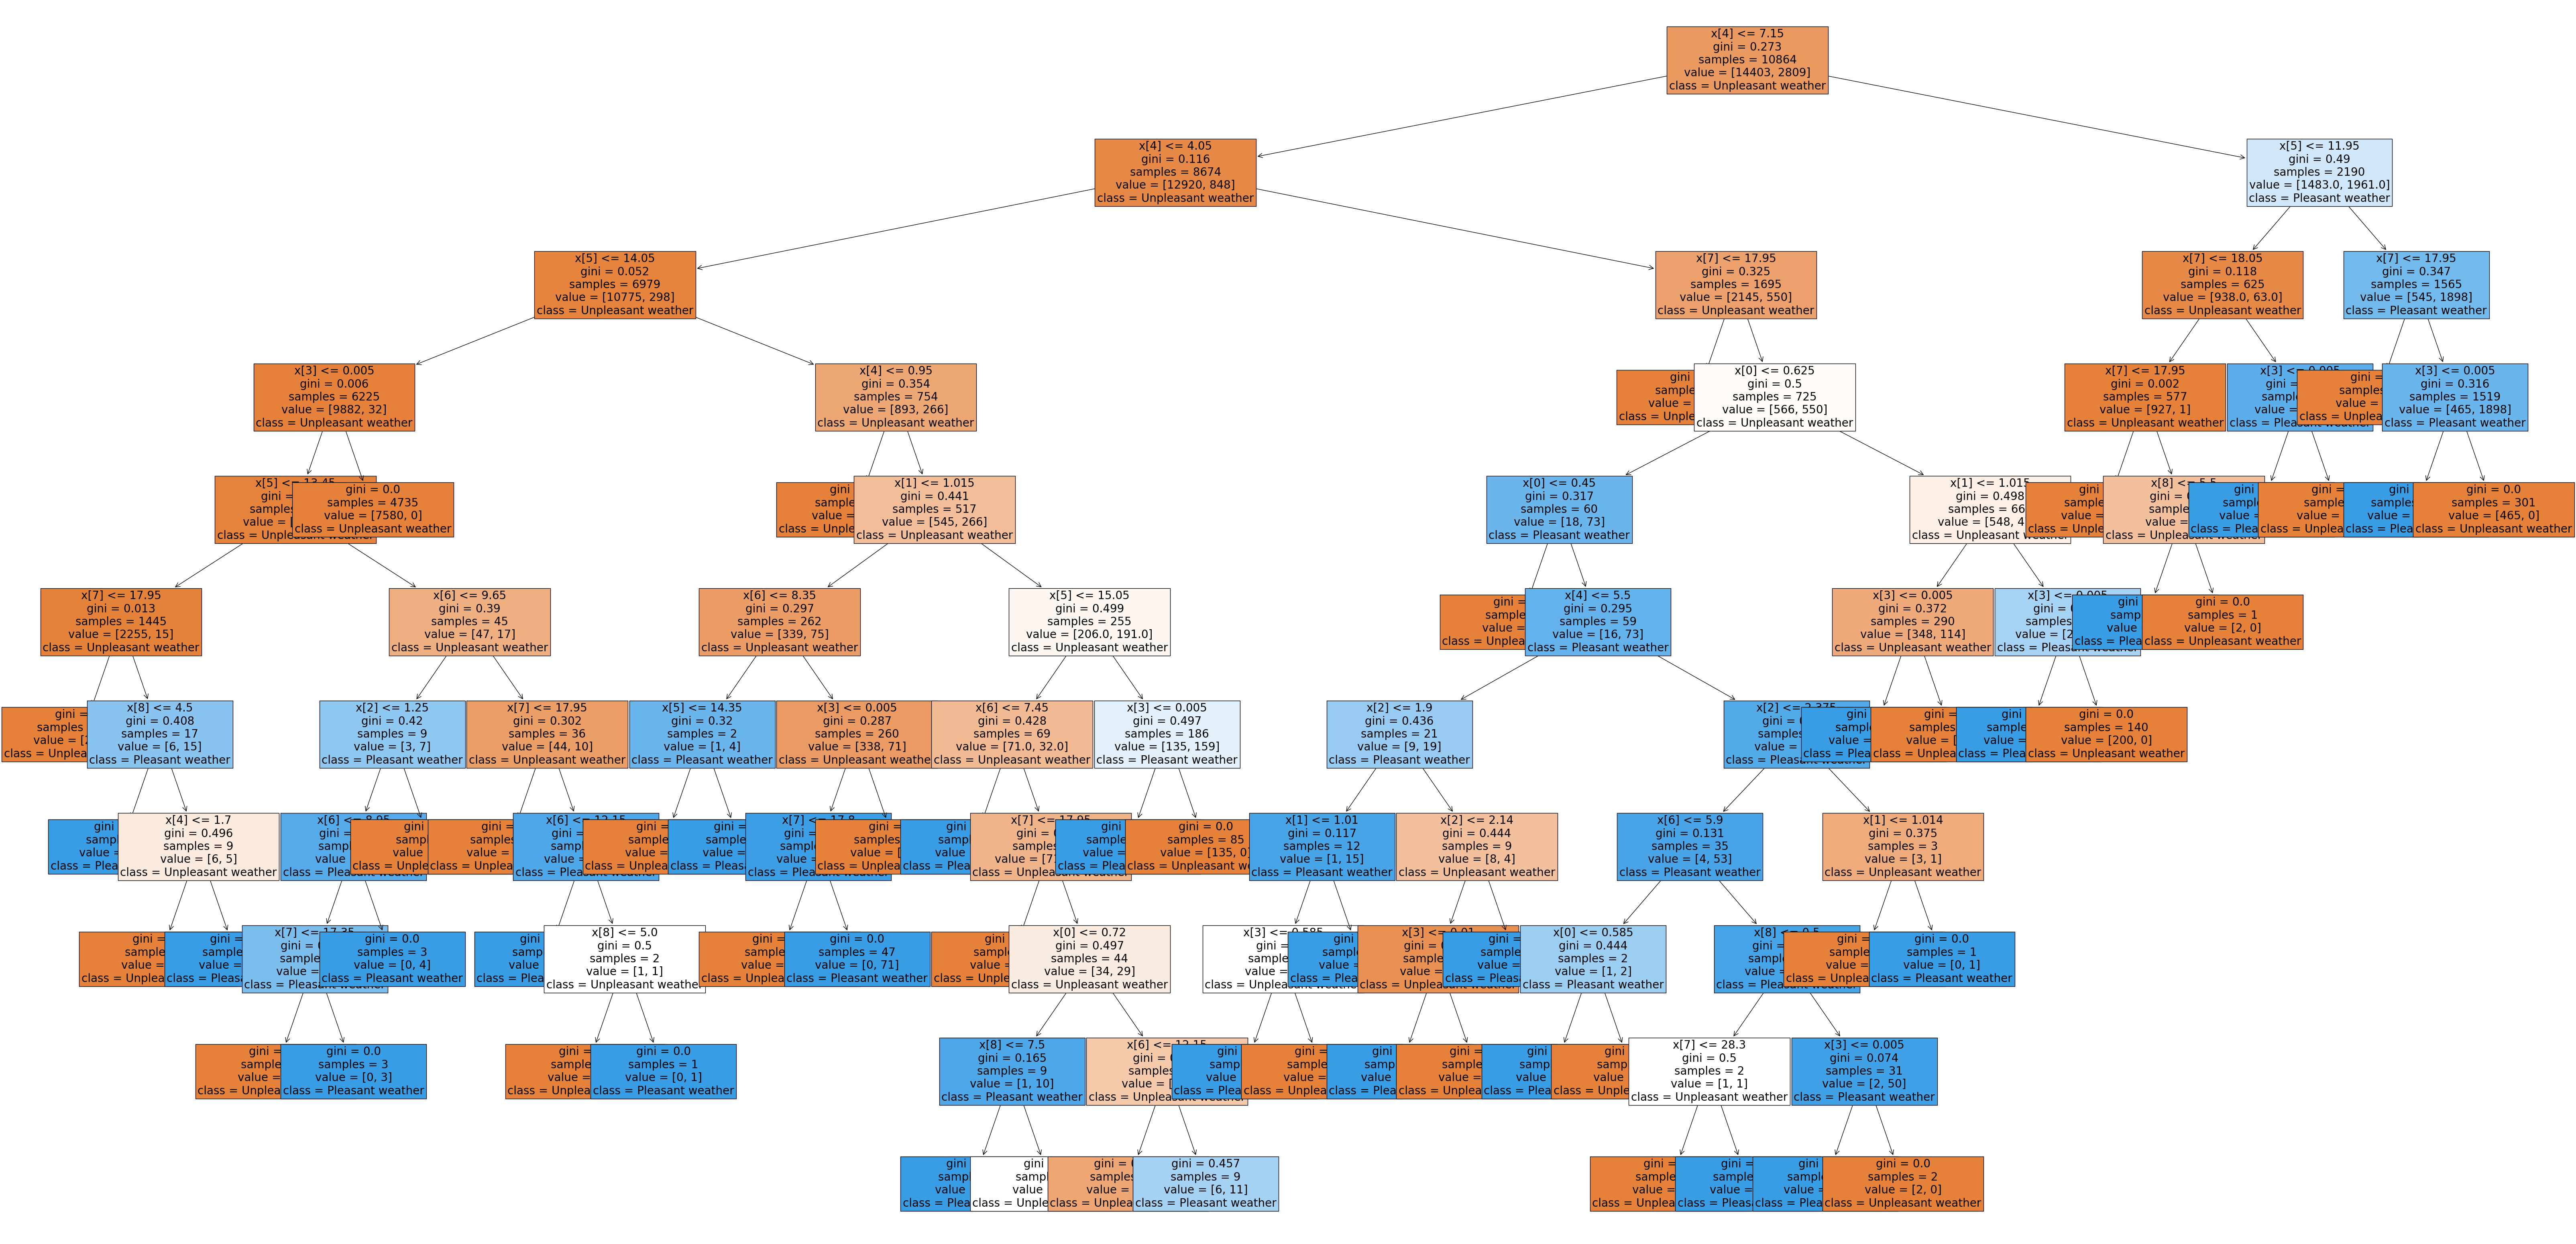

In [23]:
types = {0:'Unpleasant weather', 1:'Pleasant weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=types, filled=True);

In [24]:
fig.savefig(os.path.join(path, 'Visualizations', 'random_forest_90s_kassel.png'),bbox_inches='tight')

#### 04 Identify Feature Importances

In [26]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.03107544, 0.02006076, 0.07480071, 0.33126264, 0.08087216,
       0.15931408, 0.02287182, 0.27838708, 0.0013553 ])

In [27]:
# create list of weather features
features = ['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [28]:
important = pd.Series(newarray, index = features) #.sort_values(ascending = False)
important

cloud_cover         0.031075
humidity            0.020061
pressure            0.074801
global_radiation    0.331263
precipitation       0.080872
sunshine            0.159314
temp_mean           0.022872
temp_min            0.278387
temp_max            0.001355
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


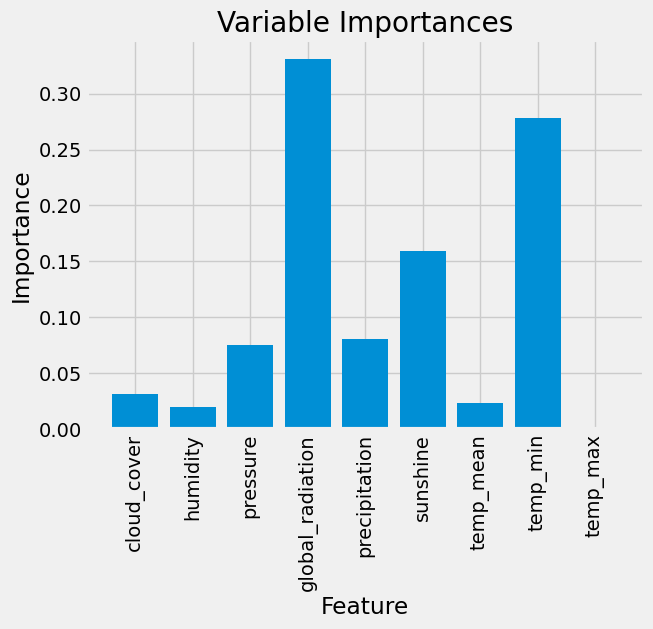

In [29]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(features)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, features, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Variable Importances');

plt.savefig(os.path.join(path, 'Visualizations', 'importances_kassel_90s.png'), bbox_inches='tight')